This project focuses on detecting fuel theft in delivery trucks by monitoring real-time fuel levels using GPS and IoT sensors. The goal is to identify discrepancies between expected and actual fuel usage and alert authorities when suspicious activity is detected.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import smtplib

In [18]:
# Load sample fuel data (replace with real sensor data)
data = pd.DataFrame({
    'distance_traveled_km': np.random.randint(10, 300, 100),
    'fuel_level_start': np.random.randint(50, 100, 100),
    'fuel_level_end': np.random.randint(30, 90, 100),
    'speed_avg': np.random.randint(20, 100, 100)
})

In [20]:
# Calculate fuel consumption
data['fuel_consumed'] = data['fuel_level_start'] - data['fuel_level_end']
data['expected_consumption'] = data['distance_traveled_km'] * 0.2  # Assume 5km per liter

In [22]:
# Mark theft cases where fuel drop is abnormally high
data['theft_flag'] = np.where(data['fuel_consumed'] > (data['expected_consumption'] * 1.5), 1, 0)

In [24]:
# Train-test split
X = data[['distance_traveled_km', 'fuel_level_start', 'fuel_level_end', 'speed_avg']]
y = data['theft_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
# Predict on test data
y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89        16
           1       0.00      0.00      0.00         4

    accuracy                           0.80        20
   macro avg       0.40      0.50      0.44        20
weighted avg       0.64      0.80      0.71        20



C:\Users\siddharth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\siddharth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\siddharth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
# Function to detect theft and send alert
def detect_theft(fuel_start, fuel_end, threshold=5):
    drop_percentage = ((fuel_start - fuel_end) / fuel_start) * 100
    return drop_percentage > threshold

In [40]:
def send_alert(location):
    sender = "your_email@gmail.com"
    receiver = "manager_email@gmail.com"
    subject = "🚨 Fuel Theft Alert 🚨"
    body = f"Fuel theft detected at location: {location}. Check immediately."
    message = f"Subject: {subject}\n\n{body}"

In [42]:
# Test the system with an example case
fuel_start = 90  # Liters
fuel_end = 60     # Liters after trip

In [44]:
if detect_theft(fuel_start, fuel_end):
    send_alert("51.5074° N, 0.1278° W")  # Example GPS Coordinates

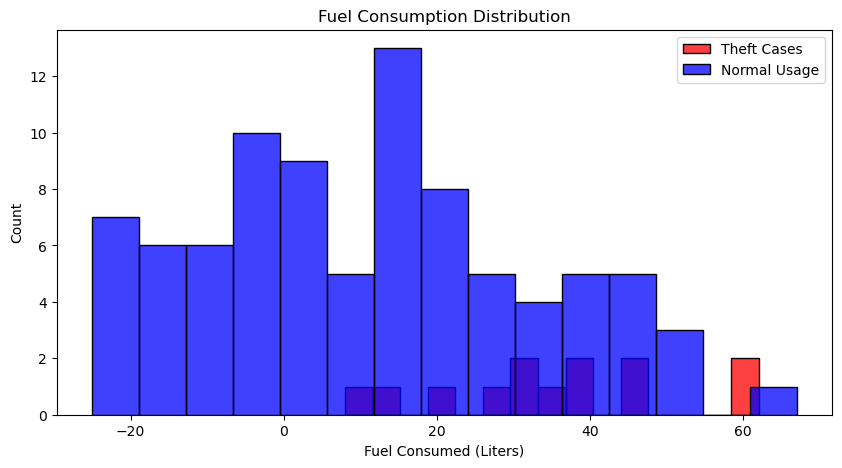

In [46]:
# Visualizing fuel theft cases
plt.figure(figsize=(10, 5))
sns.histplot(data[data['theft_flag'] == 1]['fuel_consumed'], bins=15, color='red', label='Theft Cases')
sns.histplot(data[data['theft_flag'] == 0]['fuel_consumed'], bins=15, color='blue', label='Normal Usage')
plt.xlabel("Fuel Consumed (Liters)")
plt.ylabel("Count")
plt.legend()
plt.title("Fuel Consumption Distribution")
plt.show()